In [7]:
import pandas as pd
import scanpy as sc
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import math

In [2]:
adata = sc.read('/mnt/ibm_lg/laura.garcia/glioblastoma/analysis/mcherry_alignment/multiome/data/3GEX_cells.h5ad')


In [3]:
adata

AnnData object with n_obs × n_vars = 16918 × 21365
    obs: 'site', 'donor', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'n_genes', 'groups', 'leiden_res1', 'doublet_score', 'predicted_doublet', 'sample_group', 'leiden', 'leiden_sample'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'donor_colors', 'hvg', 'leiden', 'leiden_res1_colors', 'neighbors', 'pca', 'predicted_doublet_colors', 'rank_genes_res1', 'sample_group_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [4]:
MES2 = ['Hilpda', 'Adm', 'Ddit3', 'Ndrg1', 'Herpud1', 'Dnajb9', 'Trib3', 'Eno2', 'Akap12', 'Sqstm1', 'Atf3', 'Nampt', 'Nrn1', 'Slc2a1', 'Bnip3', 'Lgals3', 'Insig2', 'Igfbp3', 'Ppp1r15a', 'Vim', 'Plod2', 'Gbe1', 'Slc2a3', 'Wars', 'Ero1l', 'Xpot', 'Hspa5', 'Gdf15', 'Anxa2', 'Epas1', 'Ldha', 'P4ha1', 'Sertad1', 'Pfkp', 'Pgk1', 'Egln3', 'Slc6a6', 'Bnip3l', 'Rpl21', 'Tram1', 'Ufm1', 'Asns', 'Golt1b', 'Angptl4', 'Slc39a14', 'Cdkn1a', 'Hspa9']
MES1 = ['Anxa2', 'Anxa1', 'Cd44', 'Vim', 'Nampt', 'Efemp1', 'Sod2', 'Ifitm3', 'Timp1', 'Spp1', 'A2m', 'S100a11', 'S100a10', 'Fn1', 'Lgals1', 'S100a16', 'Clic1', 'Mgst1', 'Rcan1', 'Tagln2', 'Npc2', 'Serping1', 'Emp1', 'Apoe', 'Ctsb', 'C3', 'Lgals3', 'Emp3', 'Actn1', 'Prdx6', 'Igfbp7', 'Serpine1', 'Plp2', 'Mgp', 'Clic4', 'Gfpt2', 'Gsn', 'Nnmt', 'Tuba1c', 'Gja1', 'Tnfrsf1a', 'Wwtr1']
OPC = ['Bcan', 'Plp1', 'Gpr17', 'Fibin', 'Lhfpl3', 'Olig1', 'Psat1', 'Scrg1', 'Omg', 'Apod', 'Sirt2', 'Tnr', 'Thy1', 'Phyhipl', 'Nkain4', 'Ptprz1', 'Vcan', 'Dbi', 'Cnp', 'Tns3', 'Lima1', 'Pcdhgc3', 'Cntn1', 'P2rx7', 'Cadm2', 'Ttyh1', 'Fgf12', 'Neu4', 'Fxyd6', 'Rnf13', 'Rtkn', 'Gpm6b', 'Lmf1', 'Alcam', 'Pgrmc1', 'Bcas1', 'Rab31', 'Pllp', 'Fabp5', 'Nlgn3', 'Serinc5', 'Epb41l2', 'Gpr37l1']
AC = ['Cst3', 'S100b', 'Slc1a3', 'Hopx', 'Mt3', 'Sparcl1', 'Mlc1', 'Gfap', 'Fabp7', 'Bcan', 'Pon2', 'Sparc', 'Gatm', 'Ramp1', 'Aqp4', 'Dbi', 'Ednrb', 'Ptprz1', 'Clu', 'Pmp22', 'Atp1a2', 'S100a16', 'Hey1', 'Pcdhgc3', 'Ttyh1', 'Ndrg2', 'Prcp', 'Atp1b2', 'Agt', 'Pltp', 'Gpm6b', 'F3', 'Rab31', 'Anxa5', 'Tspan7']
NPC1 = ['Dll3', 'Dll1', 'Sox4', 'Tubb3', 'Hes6', 'Tagln3', 'Neu4', 'Marcksl1', 'Stmn1', 'Tcf12', 'Bex1', 'Olig1', 'Map2', 'Fxyd6', 'Ptprs', 'Mllt11', 'Nppa', 'Bcan', 'Mest', 'Ascl1', 'Btg2', 'Dcx', 'Nxph1', 'Pfn2', 'Scg3', 'Myt1', 'Chd7', 'Tuba1a', 'Pcbp4', 'Etv1', 'Shd', 'Tnr', 'Amotl2', 'Dbn1', 'Hip1', 'Abat', 'Elavl4', 'Lmf1', 'Grik2', 'Serinc5', 'Tspan13', 'Elmo1', 'Glcci1', 'Sez6l', 'Lrrn1', 'Sez6', 'Sox11']
NPC2 = ['Stmn2', 'Rnd3', 'Tubb3', 'Miat', 'Dcx', 'Nsg1', 'Elavl4', 'Mllt11', 'Sox11', 'Nrep', 'Fnbp1l', 'Tagln3', 'Stmn4', 'Dlx5', 'Sox4', 'Map1b', 'Rbfox2', 'Igfbpl1', 'Stmn1', 'Dpysl3', 'Sept3', 'Pkia', 'Atp1b1', 'Dync1i1', 'Cd200', 'Snap25', 'Pak3', 'Ndrg4', 'Kif5a', 'Uchl1', 'Eno2', 'Kif5c', 'Ddah2', 'Tubb2a', 'Lbh', 'Tcf4', 'Gng3', 'Nfib', 'Dpysl5', 'Crabp1', 'Dbn1', 'Nfix', 'Cep170', 'Blcap']


In [5]:
sc.tl.score_genes(adata, MES2, score_name='MES2')
sc.tl.score_genes(adata, MES1, score_name='MES1')
sc.tl.score_genes(adata, OPC, score_name='OPC')
sc.tl.score_genes(adata, AC, score_name='AC')
sc.tl.score_genes(adata, NPC1, score_name='NPC1')
sc.tl.score_genes(adata, NPC2, score_name='NPC2')


/data/laura.garcia/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/data/laura.garcia/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/data/laura.garcia/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/data/laura.garcia/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[g

In [6]:
NPC = NPC1 + NPC2
MES = MES1 + MES2
sc.tl.score_genes(adata, NPC, score_name='NPC')
sc.tl.score_genes(adata, MES, score_name='MES')

/data/laura.garcia/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/data/laura.garcia/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


In [7]:
# scores = adata.obs[['AC','OPC','NPC','MES']]

In [8]:
# state = ""
# state = pd.Series('AC', index=scores.index)
# state[scores.OPC > scores.AC] = 'OPC'
# state[scores.NPC > scores.AC] = 'NPC'
# state[scores.NPC > scores.OPC] = 'NPC'
# state[scores.MES > scores.AC] = 'MES'
# state[scores.MES > scores.OPC] = 'MES'
# state[scores.MES > scores.NPC] = 'MES'


In [9]:
# adata.obs['state'] = state

In [8]:
df = pd.DataFrame(columns=['X','Y','S','D'])

for c in adata:
    # y-axis
    D = max(max(c.obs['NPC'].tolist()), max(c.obs['OPC'].tolist())) - max(max(c.obs['AC'].tolist()), max(c.obs['MES'].tolist()))
    y = math.log2(abs(D)+1)
    if D<0:
        y = -y 
        
    # x-axis
    if D>0:
        diff = max(c.obs['OPC'].tolist()) - max(c.obs['NPC'].tolist())
        x = math.log2(abs(diff)+1)
        if diff>0:
            x = -x
    else:
        diff = max(c.obs['AC'].tolist()) - max(c.obs['MES'].tolist())
        x = math.log2(abs(diff)+1)
        if diff>0:
            x = -x
    
    s = c.obs['sample_group'].values.tolist()
    d = c.obs['donor'].values.tolist()
    
    df2 = pd.DataFrame([[x,y,s,d]], columns=['X','Y', 'S', 'D'])
    df = df.append(df2)


/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/1282431521.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_72949/128243152

In [9]:
df

,X,Y,S,D
0,0.719501,0.441841,[brain_stage2],[A7]
0,0.109677,-0.670089,[culture],[C2]
0,0.344441,0.539764,[brain_stage2],[A5]
0,1.231621,-0.362514,[brain_stage2],[A5]
0,-1.103536,0.581483,[spheres],[S3]
...,...,...,...,...
0,1.065624,-1.302769,[culture],[C2]
0,0.734012,0.775439,[spheres],[S2]
0,0.119960,0.199014,[spheres],[S2]
0,0.696865,-0.912256,[culture],[C3]


In [10]:
df['S']= df['S'].astype(str)
df['D']= df['D'].astype(str)

In [99]:
# tab20c = sns.color_palette("tab20c").as_hex()
# colors = [tab20c[9], tab20c[1], tab20c[5]]

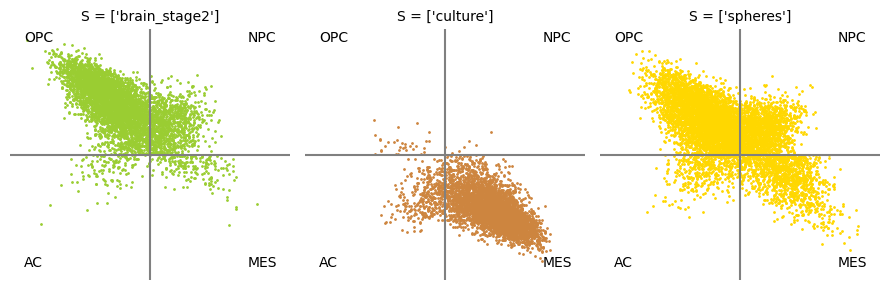

In [12]:
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.05, .95, "OPC", transform=ax.transAxes)
    ax.text(.85, .95, "NPC", transform=ax.transAxes)
    ax.text(.05, .05, "AC", transform=ax.transAxes)
    ax.text(.85, .05, "MES", transform=ax.transAxes)
    ax.set_axis_off()
    
fg = sns.FacetGrid(data=df, hue='S', col='S', height=3, aspect=1, palette=['yellowgreen','peru','gold'], legend_out=False)
fg.map(plt.scatter, 'X', 'Y', s=1).add_legend()
fg.set(ylim=(-2, 2), xlim=(-2,2))
fg.set(ylabel='Relative meta-module score', xlabel='Relative meta-module score')
fg.refline(y=0, linestyle='-')
fg.refline(x=0, linestyle='-')
fg.map_dataframe(annotate);

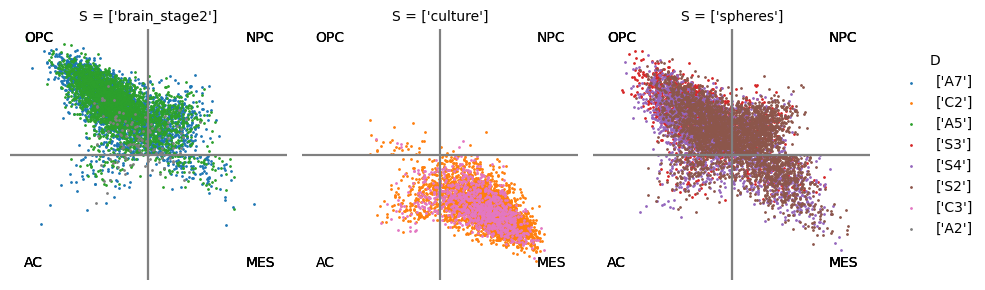

In [86]:
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.05, .95, "OPC", transform=ax.transAxes)
    ax.text(.85, .95, "NPC", transform=ax.transAxes)
    ax.text(.05, .05, "AC", transform=ax.transAxes)
    ax.text(.85, .05, "MES", transform=ax.transAxes)
    ax.set_axis_off()
    
fg = sns.FacetGrid(data=df, hue='D', col='S', height=3, aspect=1, legend_out=True)
fg.map(plt.scatter, 'X', 'Y', s=1, c=).add_legend()
fg.set(ylim=(-2, 2), xlim=(-2,2))
fg.set(ylabel='Relative meta-module score', xlabel='Relative meta-module score')
fg.refline(y=0, linestyle='-')
fg.refline(x=0, linestyle='-')
fg.map_dataframe(annotate);

---

In [3]:
adata = sc.read('./multiome/data/3GEX_malignant_late.h5ad')

In [6]:
MES2 = ['Hilpda', 'Adm', 'Ddit3', 'Ndrg1', 'Herpud1', 'Dnajb9', 'Trib3', 'Eno2', 'Akap12', 'Sqstm1', 'Atf3', 'Nampt', 'Nrn1', 'Slc2a1', 'Bnip3', 'Lgals3', 'Insig2', 'Igfbp3', 'Ppp1r15a', 'Vim', 'Plod2', 'Gbe1', 'Slc2a3', 'Wars', 'Ero1l', 'Xpot', 'Hspa5', 'Gdf15', 'Anxa2', 'Epas1', 'Ldha', 'P4ha1', 'Sertad1', 'Pfkp', 'Pgk1', 'Egln3', 'Slc6a6', 'Bnip3l', 'Rpl21', 'Tram1', 'Ufm1', 'Asns', 'Golt1b', 'Angptl4', 'Slc39a14', 'Cdkn1a', 'Hspa9']
MES1 = ['Anxa2', 'Anxa1', 'Cd44', 'Vim', 'Nampt', 'Efemp1', 'Sod2', 'Ifitm3', 'Timp1', 'Spp1', 'A2m', 'S100a11', 'S100a10', 'Fn1', 'Lgals1', 'S100a16', 'Clic1', 'Mgst1', 'Rcan1', 'Tagln2', 'Npc2', 'Serping1', 'Emp1', 'Apoe', 'Ctsb', 'C3', 'Lgals3', 'Emp3', 'Actn1', 'Prdx6', 'Igfbp7', 'Serpine1', 'Plp2', 'Mgp', 'Clic4', 'Gfpt2', 'Gsn', 'Nnmt', 'Tuba1c', 'Gja1', 'Tnfrsf1a', 'Wwtr1']
OPC = ['Bcan', 'Plp1', 'Gpr17', 'Fibin', 'Lhfpl3', 'Olig1', 'Psat1', 'Scrg1', 'Omg', 'Apod', 'Sirt2', 'Tnr', 'Thy1', 'Phyhipl', 'Nkain4', 'Ptprz1', 'Vcan', 'Dbi', 'Cnp', 'Tns3', 'Lima1', 'Pcdhgc3', 'Cntn1', 'P2rx7', 'Cadm2', 'Ttyh1', 'Fgf12', 'Neu4', 'Fxyd6', 'Rnf13', 'Rtkn', 'Gpm6b', 'Lmf1', 'Alcam', 'Pgrmc1', 'Bcas1', 'Rab31', 'Pllp', 'Fabp5', 'Nlgn3', 'Serinc5', 'Epb41l2', 'Gpr37l1']
AC = ['Cst3', 'S100b', 'Slc1a3', 'Hopx', 'Mt3', 'Sparcl1', 'Mlc1', 'Gfap', 'Fabp7', 'Bcan', 'Pon2', 'Sparc', 'Gatm', 'Ramp1', 'Aqp4', 'Dbi', 'Ednrb', 'Ptprz1', 'Clu', 'Pmp22', 'Atp1a2', 'S100a16', 'Hey1', 'Pcdhgc3', 'Ttyh1', 'Ndrg2', 'Prcp', 'Atp1b2', 'Agt', 'Pltp', 'Gpm6b', 'F3', 'Rab31', 'Anxa5', 'Tspan7']
NPC1 = ['Dll3', 'Dll1', 'Sox4', 'Tubb3', 'Hes6', 'Tagln3', 'Neu4', 'Marcksl1', 'Stmn1', 'Tcf12', 'Bex1', 'Olig1', 'Map2', 'Fxyd6', 'Ptprs', 'Mllt11', 'Nppa', 'Bcan', 'Mest', 'Ascl1', 'Btg2', 'Dcx', 'Nxph1', 'Pfn2', 'Scg3', 'Myt1', 'Chd7', 'Tuba1a', 'Pcbp4', 'Etv1', 'Shd', 'Tnr', 'Amotl2', 'Dbn1', 'Hip1', 'Abat', 'Elavl4', 'Lmf1', 'Grik2', 'Serinc5', 'Tspan13', 'Elmo1', 'Glcci1', 'Sez6l', 'Lrrn1', 'Sez6', 'Sox11']
NPC2 = ['Stmn2', 'Rnd3', 'Tubb3', 'Miat', 'Dcx', 'Nsg1', 'Elavl4', 'Mllt11', 'Sox11', 'Nrep', 'Fnbp1l', 'Tagln3', 'Stmn4', 'Dlx5', 'Sox4', 'Map1b', 'Rbfox2', 'Igfbpl1', 'Stmn1', 'Dpysl3', 'Sept3', 'Pkia', 'Atp1b1', 'Dync1i1', 'Cd200', 'Snap25', 'Pak3', 'Ndrg4', 'Kif5a', 'Uchl1', 'Eno2', 'Kif5c', 'Ddah2', 'Tubb2a', 'Lbh', 'Tcf4', 'Gng3', 'Nfib', 'Dpysl5', 'Crabp1', 'Dbn1', 'Nfix', 'Cep170', 'Blcap']

sc.tl.score_genes(adata, MES2, score_name='MES2')
sc.tl.score_genes(adata, MES1, score_name='MES1')
sc.tl.score_genes(adata, OPC, score_name='OPC')
sc.tl.score_genes(adata, AC, score_name='AC')
sc.tl.score_genes(adata, NPC1, score_name='NPC1')
sc.tl.score_genes(adata, NPC2, score_name='NPC2')

NPC = NPC1 + NPC2
MES = MES1 + MES2
sc.tl.score_genes(adata, NPC, score_name='NPC')
sc.tl.score_genes(adata, MES, score_name='MES')

In [10]:
df = pd.DataFrame(columns=['X','Y','S','D'])

for c in adata:
    # y-axis
    D = max(max(c.obs['NPC'].tolist()), max(c.obs['OPC'].tolist())) - max(max(c.obs['AC'].tolist()), max(c.obs['MES'].tolist()))
    y = math.log2(abs(D)+1)
    if D<0:
        y = -y 
        
    # x-axis
    if D>0:
        diff = max(c.obs['OPC'].tolist()) - max(c.obs['NPC'].tolist())
        x = math.log2(abs(diff)+1)
        if diff>0:
            x = -x
    else:
        diff = max(c.obs['AC'].tolist()) - max(c.obs['MES'].tolist())
        x = math.log2(abs(diff)+1)
        if diff>0:
            x = -x
    
    s = c.obs['sample'].values.tolist()
    d = c.obs['treatment'].values.tolist()
    
    df2 = pd.DataFrame([[x,y,s,d]], columns=['X','Y', 'S', 'D'])
    df = pd.concat([df,df2])


In [14]:
df

,X,Y,S,D
0,-0.221717,-0.065170,['A7'],['control']
0,0.288601,0.218341,['A5'],['control']
0,0.146610,0.183034,['A5'],['control']
0,-0.098515,0.119833,['A7'],['control']
0,-0.096960,0.148334,['A7'],['control']
...,...,...,...,...
0,-0.271333,0.347353,['A5'],['control']
0,-0.239287,0.322606,['A7'],['control']
0,-0.176404,0.319519,['A7'],['control']
0,-0.176837,0.315275,['A5'],['control']


In [12]:
df['S']= df['S'].astype(str)
df['D']= df['D'].astype(str)

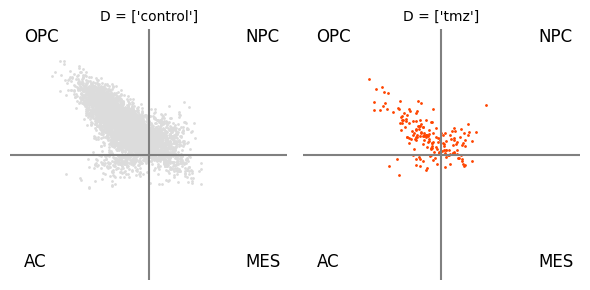

In [26]:
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.05, .95, "OPC", transform=ax.transAxes, fontsize='large')
    ax.text(.85, .95, "NPC", transform=ax.transAxes, fontsize='large')
    ax.text(.05, .05, "AC", transform=ax.transAxes, fontsize='large')
    ax.text(.85, .05, "MES", transform=ax.transAxes, fontsize='large')
    ax.set_axis_off()
    
fg = sns.FacetGrid(data=df, hue='D', col='D', height=3, aspect=1, palette=['gainsboro','orangered'], legend_out=False)
fg.map(plt.scatter, 'X', 'Y', s=1).add_legend()
fg.set(ylim=(-1.2, 1.2), xlim=(-1.2,1.2))
fg.set(ylabel='Relative meta-module score', xlabel='Relative meta-module score')
fg.refline(y=0, linestyle='-')
fg.refline(x=0, linestyle='-')
fg.map_dataframe(annotate);